In [17]:
%matplotlib inline

In [18]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def roll_die():
    return random.randint(1, 6)

In [2]:
class PigSolitaireGame:

    def __init__(self, player):
        self.player = player

    def play_game(self):
        total_points = 0

        for _ in range(7):
            total_points += self.player.play_turn()

        return total_points

In [3]:
class Player:

    def __init__(self):
        self.points = 0
        self.rolls = 0

    def reset(self):
        self.points = 0
        self.rolls = 0

    def is_rolling_again(self):
        return False

    def play_turn(self):
        self.reset()

        while True:
            roll = roll_die()
            self.rolls += 1

            if roll == 1:
                break
            else:
                self.points += roll

            if not self.is_rolling_again():
                break

        return self.points

In [8]:
class LowPointsPlayer(Player):
    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.points <= 8

In [9]:
class MediumPointsPlayer(Player):
    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.points <= 16

In [6]:
class HighPointsPlayer(Player):
    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.points <= 25

In [10]:
class LowRollsPlayer(Player):

    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.rolls <= 2

In [11]:
class MediumRollsPlayer(Player):

    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.rolls <= 4

In [12]:
class HighRollsPlayers(Player):

    def __init__(self):
            super().__init__()

    def is_rolling_again(self):
        return self.rolls <= 6

In [14]:
low_roll_sims = []
medium_roll_sims = []
high_roll_sims = []
low_point_sims = []
medium_point_sims = []
high_point_sims = []


In [15]:
def run_sims(n):
    while n > 0:

        game = PigSolitaireGame(LowRollsPlayer())
        low_roll_sims.append(game.play_game())

        game = PigSolitaireGame(MediumRollsPlayer())
        medium_roll_sims.append(game.play_game())

        game = PigSolitaireGame(HighRollsPlayers())
        high_roll_sims.append(game.play_game())

        game = PigSolitaireGame(LowPointsPlayer())
        low_point_sims.append(game.play_game())

        game = PigSolitaireGame(MediumPointsPlayer())
        medium_point_sims.append(game.play_game())

        game = PigSolitaireGame(HighPointsPlayer())
        high_point_sims.append(game.play_game())

        n -= 1


In [19]:
run_sims(1000)

In [23]:
mean_high_points_plyr = st.mean(high_point_sims)
stdev_high_points_plyr = st.stdev(high_point_sims)
median_high_points_plyr = st.median(high_point_sims)                            
max_high_points_plyr = max(high_point_sims)
min_high_points_plyr = min(high_point_sims)               

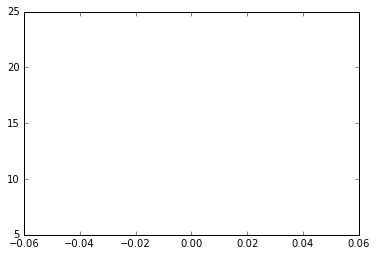

In [28]:
plt.scatter(mean_high_points_plyr, label="mean")
plt.scatter(median_high_points_plyr, color='black', label="median")
plt.scatter(min_high_points_plyr, label="min")
plt.scatter(stdev_high_points_plyr, label="stdev")
plt.scatter(min_high_points_plyr)
plt.scatter(loc='upper right')
plt.show()

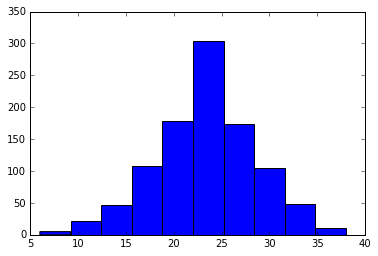

In [25]:
plt.hist(high_point_sims)
plt.show()

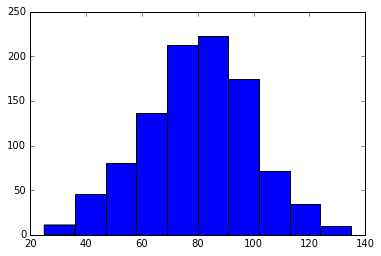

In [30]:
plt.hist(medium_point_sims)
plt.show()

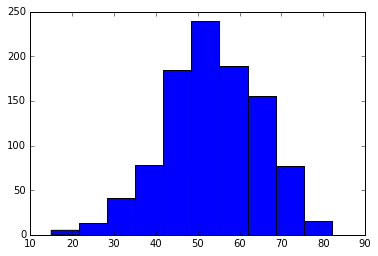

In [31]:
plt.hist(low_point_sims)
plt.show()

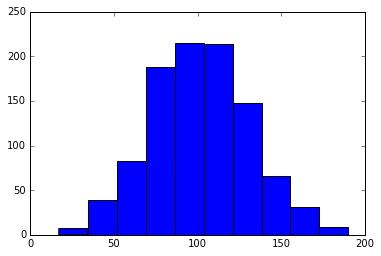

In [33]:
plt.hist(high_roll_sims)
plt.show()

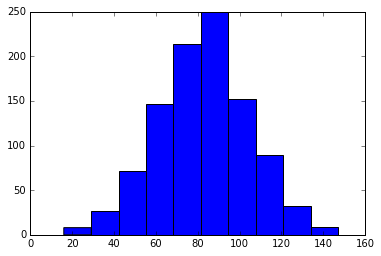

In [34]:
plt.hist(medium_roll_sims)
plt.show()

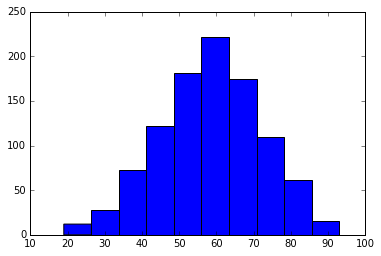

In [35]:
plt.hist(low_roll_sims)
plt.show()